# Load Dataset

In [1]:
from google.colab import drive

drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# !kaggle datasets download -d mmoreaux/audio-cats-and-dogs

In [ ]:
# import zipfile
# zip_ref = zipfile.ZipFile('/content/audio-cats-and-dogs.zip', 'r')
# zip_ref.extractall('/content/kaggle')
# zip_ref.close()

In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/drive/MyDrive/combined-data-set.zip', 'r')
zip_ref.extractall('/content/new-dataset-combined')
zip_ref.close()


In [4]:
import zipfile
zip_ref = zipfile.ZipFile('/content/drive/MyDrive/test-sound-new.zip', 'r')
zip_ref.extractall('/content/new-sounds-test-dataset')
zip_ref.close()


# Deafault Weights

In [2]:
import os
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense
from tensorflow.keras import models
from tensorflow.keras.preprocessing import image
import librosa
import scipy
import glob
import csv
from sklearn.model_selection import train_test_split

In [6]:
# Load the model.
model_yamnet = hub.load('https://tfhub.dev/google/yamnet/1')
# model_yamnet = hub.load('/content/saved_model.pb')

In [5]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import csv

import matplotlib.pyplot as plt
from IPython.display import Audio
from scipy.io import wavfile

In [6]:
# Find the name of the class with the top score when mean-aggregated across frames.
def class_names_from_csv(class_map_csv_text):
  """Returns list of class names corresponding to score vector."""
  class_names = []
  with tf.io.gfile.GFile(class_map_csv_text) as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
      class_names.append(row['display_name'])

  return class_names

class_map_path = model_yamnet.class_map_path().numpy()
class_names = class_names_from_csv(class_map_path)

In [7]:
def ensure_sample_rate(original_sample_rate, waveform,
                       desired_sample_rate=16000):
  """Resample waveform if required."""
  if original_sample_rate != desired_sample_rate:
    desired_length = int(round(float(len(waveform)) /
                               original_sample_rate * desired_sample_rate))
    waveform = scipy.signal.resample(waveform, desired_length)
  return desired_sample_rate, waveform

In [8]:
!curl -O https://storage.googleapis.com/audioset/speech_whistling2.wav

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  153k  100  153k    0     0   864k      0 --:--:-- --:--:-- --:--:--  868k


In [9]:
!curl -O https://storage.googleapis.com/audioset/miaow_16k.wav

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  210k  100  210k    0     0  1370k      0 --:--:-- --:--:-- --:--:-- 1375k


In [ ]:
!pip install pydub

In [10]:
import scipy

In [11]:
import scipy.io.wavfile as wav
import numpy as np
from scipy.signal import resample

# Function to convert audio to mono and 16kHz sample rate, and return sample_rate and wav_data
def convert_audio(input_file, target_rate=16000):
    # Read the input file
    sample_rate, data = wav.read(input_file)

    # If stereo (more than 1 channel), convert to mono by averaging the channels
    if len(data.shape) > 1:
        data = np.mean(data, axis=1).astype(np.int16)

    # Resample audio to target sample rate (16kHz)
    duration = len(data) / sample_rate
    new_length = int(duration * target_rate)
    resampled_data = resample(data, new_length).astype(np.int16)

    # Return the sample rate and the resampled wav data
    return target_rate, resampled_data


# Example usage
# input_file = "/content/human-dog.MP3"  # Replace with your uploaded file path
# output_file = "/content/human-dog-out.wav"  # Output file path

# convert_audio('/content/cat-sound.wav')


In [13]:
wav_file_name = 'speech_whistling2.wav'
wav_file_name = '/content/human-dog-out.wav'
# wav_file_name = 'miaow_16k.wav'
wav_file_name = '/content/Cat Meowing - Sound Effect - Download.wav'
wav_file_name = '/content/female pomeranian dog barking ｜ pomeranian Puppies Barking.wav'
wav_file_name = '/content/speech_whistling2.wav'
wav_file_name = '/content/Cat Meowing - Sound Effect - Download.wav'
wav_file_name = '/content/kaggle/cats_dogs/test/cats/cat_110.wav'
wav_file_name = '/content/kaggle/cats_dogs/train/dog/dog_barking_1.wav'
wav_file_name = '/content/kaggle/cats_dogs/train/dog/dog_barking_111.wav'
wav_file_name = '/content/kaggle/cats_dogs/train/dog/dog_barking_25.wav'
wav_file_name = '/content/new-dataset/cat-and-dog/cat/cat0027.wav'
wav_file_name = '/content/new-dataset/cat-and-dog/cat/cat0038.wav'
wav_file_name = '/content/new-dataset/cat-and-dog/dog/dog0025.wav'
wav_file_name = '/content/miaow_16k.wav'



sample_rate, wav_data = convert_audio(wav_file_name)
sample_rate, wav_data = ensure_sample_rate(sample_rate, wav_data)

# Show some basic information about the audio.
duration = len(wav_data)/sample_rate
print(f'Sample rate: {sample_rate} Hz')
print(f'Total duration: {duration:.2f}s')
print(f'Size of the input: {len(wav_data)}')

# Listening to the wav file.
Audio(wav_data, rate=sample_rate)

waveform = wav_data / tf.int16.max

scores, embeddings, spectrogram = model_yamnet(waveform)

scores_np = scores.numpy()
# print(scores_np.mean(axis=0))
spectrogram_np = spectrogram.numpy()
infered_class = class_names[scores_np.mean(axis=0).argmax()]

mean_scores = np.mean(scores, axis=0)
top_n = 10
top_class_indices = np.argsort(mean_scores)[::-1][:top_n]

print(class_names[top_class_indices[1]])

print(f'The main sound is: {infered_class}')

<ipython-input-11-458177f3811b>:8: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sample_rate, data = wav.read(input_file)


Sample rate: 16000 Hz
Total duration: 6.73s
Size of the input: 107698
Domestic animals, pets
The main sound is: Animal


## Visualization

[ 67  68  76  78  93  94  81  80  69 103]


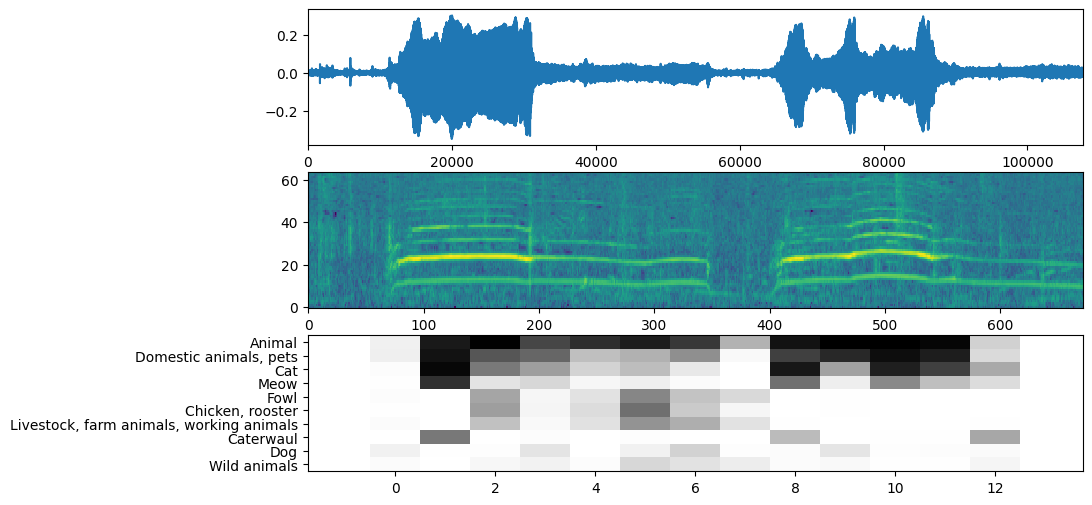

In [14]:
plt.figure(figsize=(10, 6))

# Plot the waveform.
plt.subplot(3, 1, 1)
plt.plot(waveform)
plt.xlim([0, len(waveform)])

# Plot the log-mel spectrogram (returned by the model).
plt.subplot(3, 1, 2)
plt.imshow(spectrogram_np.T, aspect='auto', interpolation='nearest', origin='lower')

# Plot and label the model output scores for the top-scoring classes.
mean_scores = np.mean(scores, axis=0)
top_n = 10
top_class_indices = np.argsort(mean_scores)[::-1][:top_n]
plt.subplot(3, 1, 3)
plt.imshow(scores_np[:, top_class_indices].T, aspect='auto', interpolation='nearest', cmap='gray_r')

print(top_class_indices)

# patch_padding = (PATCH_WINDOW_SECONDS / 2) / PATCH_HOP_SECONDS
# values from the model documentation
patch_padding = (0.025 / 2) / 0.01
plt.xlim([-patch_padding-0.5, scores.shape[0] + patch_padding-0.5])
# Label the top_N classes.
yticks = range(0, top_n, 1)
plt.yticks(yticks, [class_names[top_class_indices[x]] for x in yticks])
_ = plt.ylim(-0.5 + np.array([top_n, 0]))

[[-2.340365  -2.4082675 -2.9147615 ... -1.9345467 -2.1910505 -2.724824 ]
 [-2.6085396 -1.9877855 -2.2110033 ... -2.174355  -1.8793231 -2.1158304]
 [-1.7609422 -1.0742167 -1.1173067 ... -2.2850938 -2.46636   -2.2468753]
 ...
 [-1.6022599 -1.9902135 -1.9113342 ... -1.8138709 -2.2080107 -2.439632 ]
 [-1.9564372 -2.1218886 -1.8339764 ... -2.1920457 -2.1139069 -2.4963584]
 [-1.7334923 -1.8713899 -1.9561157 ... -2.2021534 -1.8027093 -2.2412434]]
(64, 672)


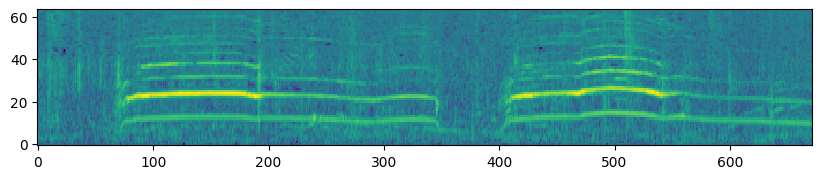

In [15]:
plt.figure(figsize=(10, 6))

# Plot the waveform.
# plt.subplot(3, 1, 1)
# plt.plot(waveform)
# plt.xlim([0, len(waveform)])

# Plot the log-mel spectrogram (returned by the model).
print(spectrogram_np.T)
print(spectrogram_np.T.shape)
plt.subplot(3, 1, 2)
plt.imshow(spectrogram_np.T, aspect='auto', interpolation='nearest', origin='lower')

# Plot and label the model output scores for the top-scoring classes.
# mean_scores = np.mean(scores, axis=0)
# top_n = 10
# top_class_indices = np.argsort(mean_scores)[::-1][:top_n]
# plt.subplot(3, 1, 3)
# plt.imshow(scores_np[:, top_class_indices].T, aspect='auto', interpolation='nearest', cmap='gray_r')

# print(top_class_indices)

# # patch_padding = (PATCH_WINDOW_SECONDS / 2) / PATCH_HOP_SECONDS
# # values from the model documentation
# patch_padding = (0.025 / 2) / 0.01
# plt.xlim([-patch_padding-0.5, scores.shape[0] + patch_padding-0.5])
# # Label the top_N classes.
# yticks = range(0, top_n, 1)
# plt.yticks(yticks, [class_names[top_class_indices[x]] for x in yticks])
# _ = plt.ylim(-0.5 + np.array([top_n, 0]))

# Custom Trained model

In [ ]:
pip install librosa==0.9.2


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 214.3/214.3 kB 7.5 MB/s eta 0:00:00
  Attempting uninstall: librosa
    Found existing installation: librosa 0.8.0
    Uninstalling librosa-0.8.0:
      Successfully uninstalled librosa-0.8.0


In [16]:
import os
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense
from tensorflow.keras import models
from tensorflow.keras.preprocessing import image
import librosa
import scipy
import glob
import csv
from sklearn.model_selection import train_test_split

In [18]:
data_path=r'/content/new-dataset-combined'

labels=os.listdir(data_path)
categories=np.arange(len(labels))
category_dict=dict(zip(labels,categories))

print(labels)
print(categories)
print(category_dict)

['cat', 'dog']
[0 1]
{'cat': 0, 'dog': 1}


In [19]:
def featureExtraction(wav_file_name):
  # wav_file_name = '/content/new-dataset/cat-and-dog/dog/dog0025.wav'



  sample_rate, wav_data = convert_audio(wav_file_name)
  sample_rate, wav_data = ensure_sample_rate(sample_rate, wav_data)

  # Show some basic information about the aud|io.
  duration = len(wav_data)/sample_rate
  print(f'Sample rate: {sample_rate} Hz')
  print(f'Total duration: {duration:.2f}s')
  print(f'Size of the input: {len(wav_data)}')

  # Listening to the wav file.
  Audio(wav_data, rate=sample_rate)

  waveform = wav_data / tf.int16.max

  return model_yamnet(waveform)

In [20]:
data=[]
target=[]

for label in labels:
    print(label)
    files = os.listdir(data_path+'/'+label)
    print(files)

    for file_name in files:
      # pass
      final_file=data_path+'/'+label+'/'+file_name
      # createXData
      # print(createXData(final_file))
      print(final_file)
      try:
        # pass
        scores, embeddings, spectrogram = featureExtraction(final_file)
        # print(scores)
        # print(np.array(embeddings).shape)
        mean_embeddings = np.mean(embeddings.numpy(), axis=0)
        # print(spectrogram)
        data.append(mean_embeddings)
        target.append([category_dict[label]])
        # print(np.array(mean_embeddings).shape)
      except Exception as e:
        #Do something
        print(e)



print(data)

cat
['cat0181.wav', 'cat0062.wav', 'cat0003.wav', 'cat0483.wav', 'cat0045.wav', 'cat0505.wav', 'cat0125.wav', 'cat0412.wav', 'cat0397.wav', 'cat0370.wav', 'cat0040.wav', 'cat0257.wav', 'cat0206.wav', 'cat0133.wav', 'cat_23.wav', 'cat0427.wav', 'cat0237.wav', 'cat0552.wav', 'cat0368.wav', 'cat0373.wav', 'cat0184.wav', 'cat_130.wavq--.wav', 'cat_103.wav', 'cat0236.wav', 'cat_147.wav', 'cat_163.wav', 'cat0358.wav', 'cat_76.wavq--.wav', 'cat0484.wav', 'cat_124.wav', 'cat_25.wav', 'cat0293.wav', 'cat_126.wavq--.wav', 'cat0435.wav', 'cat0408.wav', 'cat_94.wav', 'cat_88.wavq--.wav', 'cat0156.wav', 'cat0428.wav', 'cat_129.wavq--.wav', 'cat0076.wav', 'cat0053.wav', 'cat0051.wav', 'cat0417.wav', 'cat_32.wav', 'cat0481.wav', 'cat_48.wav', 'cat0381.wav', 'cat0131.wav', 'cat0351.wav', 'cat0298.wav', 'cat0514.wav', 'cat0186.wav', 'cat0271.wav', 'cat0477.wav', 'cat0314.wav', 'cat0217.wav', 'cat_125.wav', 'cat0531.wav', 'cat0523.wav', 'cat0259.wav', 'cat0317.wav', 'cat_106.wav', 'cat0068.wav', 'cat005

<ipython-input-11-458177f3811b>:8: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sample_rate, data = wav.read(input_file)


Streaming output truncated to the last 5000 lines.
Size of the input: 11302
/content/new-dataset-combined/cat/cat0165.wav
Sample rate: 16000 Hz
Total duration: 1.79s
Size of the input: 28600
/content/new-dataset-combined/cat/cat0325.wav
Sample rate: 16000 Hz
Total duration: 0.46s
Size of the input: 7380
/content/new-dataset-combined/cat/cat0497.wav
Sample rate: 16000 Hz
Total duration: 0.53s
Size of the input: 8464
/content/new-dataset-combined/cat/cat0146.wav
Sample rate: 16000 Hz
Total duration: 0.70s
Size of the input: 11186
/content/new-dataset-combined/cat/cat0081.wav
Sample rate: 16000 Hz
Total duration: 0.69s
Size of the input: 11071
/content/new-dataset-combined/cat/cat_157.wav
Sample rate: 16000 Hz
Total duration: 6.00s
Size of the input: 96000
/content/new-dataset-combined/cat/cat0267.wav
Sample rate: 16000 Hz
Total duration: 0.54s
Size of the input: 8591
/content/new-dataset-combined/cat/cat0362.wav
Sample rate: 16000 Hz
Total duration: 0.90s
Size of the input: 14415
/conten

In [21]:
np.array(data).shape

(1327, 1024)

In [22]:
type(data)

list

In [23]:
np.array(data)

array([[0.        , 0.5097402 , 1.3410522 , ..., 0.05757377, 0.        ,
        0.        ],
       [0.        , 1.5390992 , 0.14688432, ..., 0.        , 0.        ,
        0.        ],
       [0.18728186, 1.4198209 , 0.47047222, ..., 0.08189252, 0.2057542 ,
        0.30209103],
       ...,
       [0.        , 0.        , 4.1491814 , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.2251983 , 1.7285324 , ..., 0.03224856, 0.        ,
        0.        ],
       [0.        , 0.5296275 , 3.6001575 , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

In [24]:
data=np.array(data)
target=np.array(target)

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

In [26]:
X_train.shape

(1061, 1024)

In [27]:
y_train.shape

(1061, 1)

In [70]:
model = models.Sequential([
    Dense(1024, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(512, activation='relu'),
    Dense(len(categories), activation='softmax')  # Output layer with one neuron per class
])


In [71]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [72]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 1024)                │       1,049,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 2)                   │           1,026 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,575,426 (6.01 MB)

 Trainable params: 1,575,426 (6.01 MB)

 Non-trainable params: 0 (0.00 B)

In [74]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.9156 - loss: 0.1884 - val_accuracy: 0.9812 - val_loss: 0.0772
Epoch 2/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9747 - loss: 0.1091 - val_accuracy: 0.9737 - val_loss: 0.1051
Epoch 3/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9855 - loss: 0.0555 - val_accuracy: 0.9774 - val_loss: 0.1005
Epoch 4/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9917 - loss: 0.0352 - val_accuracy: 0.9774 - val_loss: 0.1131
Epoch 5/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9953 - loss: 0.0213 - val_accuracy: 0.9812 - val_loss: 0.1042
Epoch 6/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9965 - loss: 0.0137 - val_accuracy: 0.9812 - val_loss: 0.1041
Epoch 7/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9987 - loss: 0.0033 - val_accuracy: 0.9812 - val_loss: 0.1417
Epoch 8/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9991 - loss: 0.0062 - val_accuracy: 0.9774 - v

In [57]:
model.save_weights('custom_yamnet_model-weights.weights.h5')

In [75]:
model.load_weights('custom_yamnet_model-weights.weights.h5')

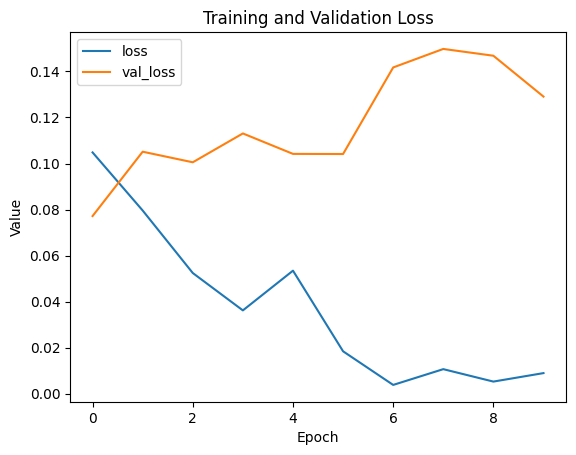

In [76]:
# plt.plot(history.history['accuracy'], label='accuracy')
# plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

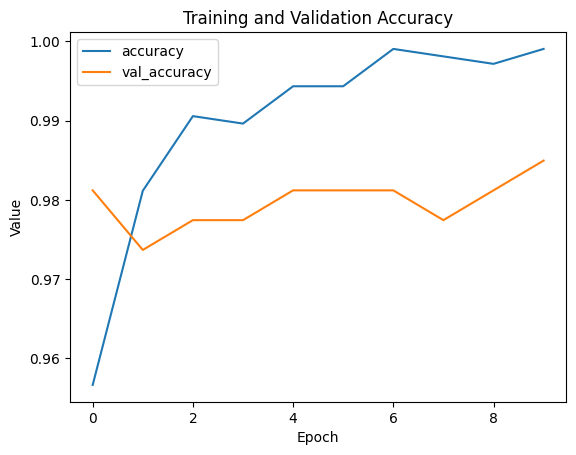

In [77]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Training and Validation Accuracy')

plt.xlabel('Epoch')
plt.ylabel('Value')
plt.legend()
plt.show()

In [78]:
import time

In [80]:
def predict_class(file_path):
  start_time=time.time()
  test_file_path=file_path
  # scores, embeddings, spectrogram = featureExtraction('/content/Angry DOG Bark & Growl (Sound Effects).wav')
  scores, embeddings, spectrogram = featureExtraction(test_file_path)
  # print(spectrogram)
  # print(np.array(embeddings).shape)
  mean_embeddings = np.mean(embeddings.numpy(), axis=0)
  # print(mean_embeddings.shape)
  # print(np.array([mean_embeddings]).shape)
  # print(X_test.shape)

  if(np.argmax(model.predict(np.array([mean_embeddings])))==0):
    print("Cat")
  else:
    print("Dog")
  print('Inference Time '+str(round((time.time()-start_time),2))+' seconds')

  # print(np.argmax(model.predict(np.array([mean_embeddings]))))

predict_class('/content/ANGRY DOG BARKING LOUDLY (1).wav')

Sample rate: 16000 Hz
Total duration: 224.40s
Size of the input: 3590362
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
Dog
Inference Time 11.15 seconds


In [81]:
predict_class('/content/miaow_16k.wav')

<ipython-input-11-458177f3811b>:8: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sample_rate, data = wav.read(input_file)


Sample rate: 16000 Hz
Total duration: 6.73s
Size of the input: 107698
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Cat
Inference Time 0.51 seconds


In [82]:
predict_class('/content/Angry Dogs Barking Sound Effect.wav')

Sample rate: 16000 Hz
Total duration: 161.98s
Size of the input: 2591718
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Dog
Inference Time 6.17 seconds


In [83]:
predict_class('/content/Cat Meowing Loudly.wav')

Sample rate: 16000 Hz
Total duration: 40.01s
Size of the input: 640128
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Cat
Inference Time 2.54 seconds


In [84]:
predict_class('/content/German Shepherd Power Barking.wav')

Sample rate: 16000 Hz
Total duration: 34.80s
Size of the input: 556721
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Dog
Inference Time 0.99 seconds


In [85]:
predict_class('/content/female pomeranian dog barking ｜ pomeranian Puppies Barking.wav')

Sample rate: 16000 Hz
Total duration: 100.24s
Size of the input: 1603849
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Dog
Inference Time 4.54 seconds


In [87]:
predict_class('/content/new-sounds-test-dataset/big-dog-bark-distant-113701-_1_.wav')

Sample rate: 16000 Hz
Total duration: 8.70s
Size of the input: 139180
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Cat
Inference Time 0.33 seconds


In [88]:
predict_class('/content/new-sounds-test-dataset/noise-removed-hunan-dog.wav')

<ipython-input-11-458177f3811b>:8: WavFileWarning: Reached EOF prematurely; finished at 944652 bytes, expected 944660 bytes from header.
  sample_rate, data = wav.read(input_file)


Sample rate: 16000 Hz
Total duration: 4.92s
Size of the input: 78714
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
Cat
Inference Time 0.4 seconds


In [89]:
predict_class('/content/new-sounds-test-dataset/صوت نباح الكلاب الشرسة  Dog sounds - 개 소리 -  कुत्ते की आ (1).wav')

Sample rate: 16000 Hz
Total duration: 569.88s
Size of the input: 9118012
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Dog
Inference Time 59.68 seconds


In [90]:
predict_class('/content/new-sounds-test-dataset/🦊 CATS MEOWING - Make Your Cat or Dog Go Crazy! - Sound Effect.wav')

Sample rate: 16000 Hz
Total duration: 109.42s
Size of the input: 1750784
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Cat
Inference Time 3.53 seconds


In [92]:
!python --version

Python 3.10.12


In [94]:
len(categories)

2

In [95]:
X_train.shape[1]

1024

In [96]:
predict_class('/content/German Shepherd Power Barking.wav')

Sample rate: 16000 Hz
Total duration: 34.80s
Size of the input: 556721
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
Dog
Inference Time 1.56 seconds


In [97]:
predict_class('/content/Cat Meowing Loudly.wav')

Sample rate: 16000 Hz
Total duration: 40.01s
Size of the input: 640128
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Cat
Inference Time 3.81 seconds


In [98]:
predict_class('/content/ANGRY DOG BARKING LOUDLY (1).wav')

Sample rate: 16000 Hz
Total duration: 224.40s
Size of the input: 3590362
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Dog
Inference Time 13.76 seconds


In [ ]:
predict_class('')

In [ ]:
predict_class('')

In [ ]:
predict_class('')